## EXPLORATORY DATA ANALYSIS OF NATIONAL YOUTH SERVICE INCOME AND EXPENSES

### Dataset: 
The data used in this project covers a twelve month period between **March 2021 to February 2022** when I was involved in a cumplsory National Service in my home country which  caused my income to jump to over 100 percent during that time. 2021 was the year I started documenting  my expenditures; so data for 2020 is non existent while expenses for some months like March and April 2021 were not documented due to some reasons beyond my control however income from those months influenced an income spike in June.

### DATA DESCRIPTION
### FEATURE DICTIONARY:
1. **Month**: Month of the year which its expenses were tracked fully.
2. **Food**: Money Spent on edibles like snacks, normal meals and soda.
3. **Responsibility**: Money spent on my mother and siblings
4. **Water**: Money spent on drinking water
5. **Transport**: Money spent on transportation in and around the city
6. **Recharge**: Money spent on recharge card and internet subscription
7. **Alms**: Money spent on alms-giving
8. **Miscellaneous**: Money Spent on clothes, shoes, repairs, health, comfort, eat outs and pleasure
9. **Investments**: Money spent on computing devices, courses and mentorship
10. **Total-Expenses**: Food + Responsibility + Water + Transport + Recharge + Alms + Miscellaneous + Investments
12. **Total-Income**: Money earned from Salary and gift-money among others
13. **Year**: Year of tracking

### Project Objectives:
The aim of this analysis is to explore my spending habits within this service period as February 2021 which was the only documentation of my former low income is dropped while January and February 2022 when the service ended is added to the mix to be explored.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

a = pd.read_csv("my-expenses.txt")
b = pd.read_csv("2022-income-expenses.txt")

In [2]:
# February is not part of youth service
a = a[a["Month"]!="February"]

# joining the two different data tables of 2021 and 2022
df = a.append(b, ignore_index=True)
df.to_csv('Youth-service-income-expenses.csv', index=False)
df

,Month,Food,Responsibility,Water,Transport,Recharge,Alms,Miscellaneous,Investments,Total-Expenses,Total-income,Year
0,May,5430,2000.0,600,1750,8400,2900.00,15620.00,4000.00,34300.00,40700,2021
1,June,7150,5210.0,600,3280,4020,1600.00,50481.50,23426.00,95767.50,93250,2021
2,July,8740,20200.0,900,2790,5967,2200.00,17286.49,0.00,58083.49,64800,2021
3,August,10240,7021.5,940,920,4650,700.00,32763.14,0.00,57234.64,73350,2021
4,September,8740,0.0,800,1850,4500,550.00,10640.75,0.00,27080.75,77300,2021
5,October,8260,0.0,1120,2470,4850,2290.00,8396.40,41321.11,68707.51,61820,2021
6,November,11200,0.0,1080,1970,4140,1930.00,12974.51,20712.46,54006.97,65560,2021
7,December,12170,10300.0,1360,2250,4100,9835.75,11147.43,9670.73,60833.91,95400,2021
8,January,9570,0.0,1460,3050,4300,2030.00,9685.19,10157.87,40253.06,63650,2022
9,February,9880,0.0,1530,3370,4920,10690.00,17087.83,14000.00,61477.83,107950,2022


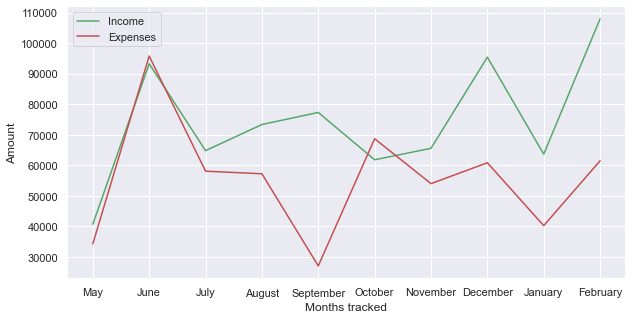

In [3]:
sns.set()
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(df["Month"], df["Total-income"], c='g')
plt.plot(df["Month"], df["Total-Expenses"], c='r')
plt.xlabel("Months tracked")
plt.ylabel("Amount")
plt.legend(["Income", "Expenses"])
plt.show()

**Description:**
Income above expenses for the majority of the months

### STATISTICAL SUMMARY

In [25]:
df.describe()

,Food,Responsibility,Water,Transport,Recharge,Alms,Miscellaneous,Investments,Total-Expenses,Total-income,Year
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,9138.000000,4473.150000,1039.000000,2370.000000,4984.700000,3472.575000,18608.324000,12328.817000,55774.566000,74378.000000,2021.200000
std,1948.947294,6620.547586,333.548264,775.213232,1328.915519,3653.350164,13182.649114,13224.243992,19324.183307,19751.925813,0.421637
min,5430.000000,0.000000,600.000000,920.000000,4020.000000,550.000000,8396.400000,0.000000,27080.750000,40700.000000,2021.000000
25%,8380.000000,0.000000,825.000000,1880.000000,4180.000000,1682.500000,10767.420000,1000.000000,43691.537500,63937.500000,2021.000000
50%,9155.000000,1000.000000,1010.000000,2360.000000,4575.000000,2115.000000,14297.255000,9914.300000,57659.065000,69455.000000,2021.000000
75%,10150.000000,6568.625000,1300.000000,2985.000000,4902.500000,2747.500000,17236.825000,19034.345000,61316.850000,89262.500000,2021.000000
max,12170.000000,20200.000000,1530.000000,3370.000000,8400.000000,10690.000000,50481.500000,41321.110000,95767.500000,107950.000000,2022.000000


### CORRELATION MATRIX

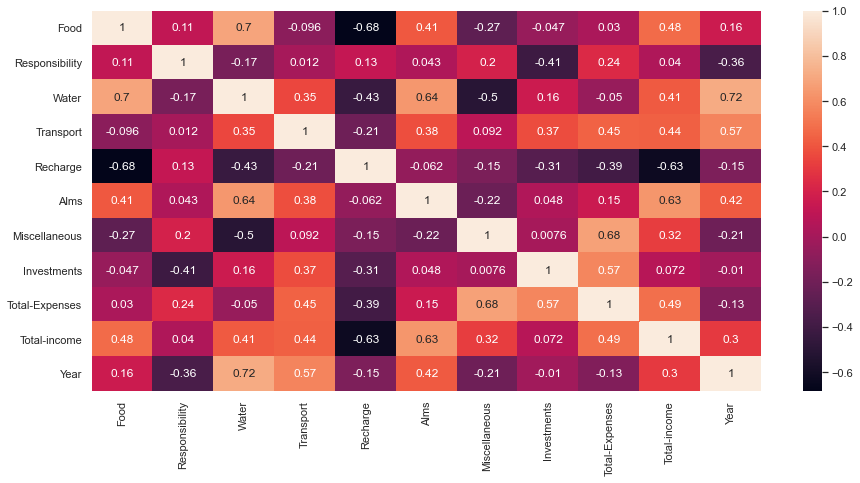

In [26]:
correlation_matrix = df.corr()
sns.set({"figure.figsize": (15,7)})
sns.heatmap(correlation_matrix, annot=True);

**Some Important Points to Pick Out**
* Money spent on food is positively correlated to money spent on water by 70 percent
* As the years increased, money spent on water increased as well by over 70 percent
* Suprisingly Income is positively correlated to almsgiving in this dataset by 63 percent
* Miscellaneous expenses is positively correlated to total expenses by 68 percent
* Total income is positively correlated to money spent on food and water at 48 percent and 41 percent respectively
* almsgiving is positively correlated to food and year at 41 and 42 percent respectively
* Money spent on Recharge is negatively correlated to total income and money spent on food at 63 percent and 68 percent respectively.

### Quick Glance on Data Distributions

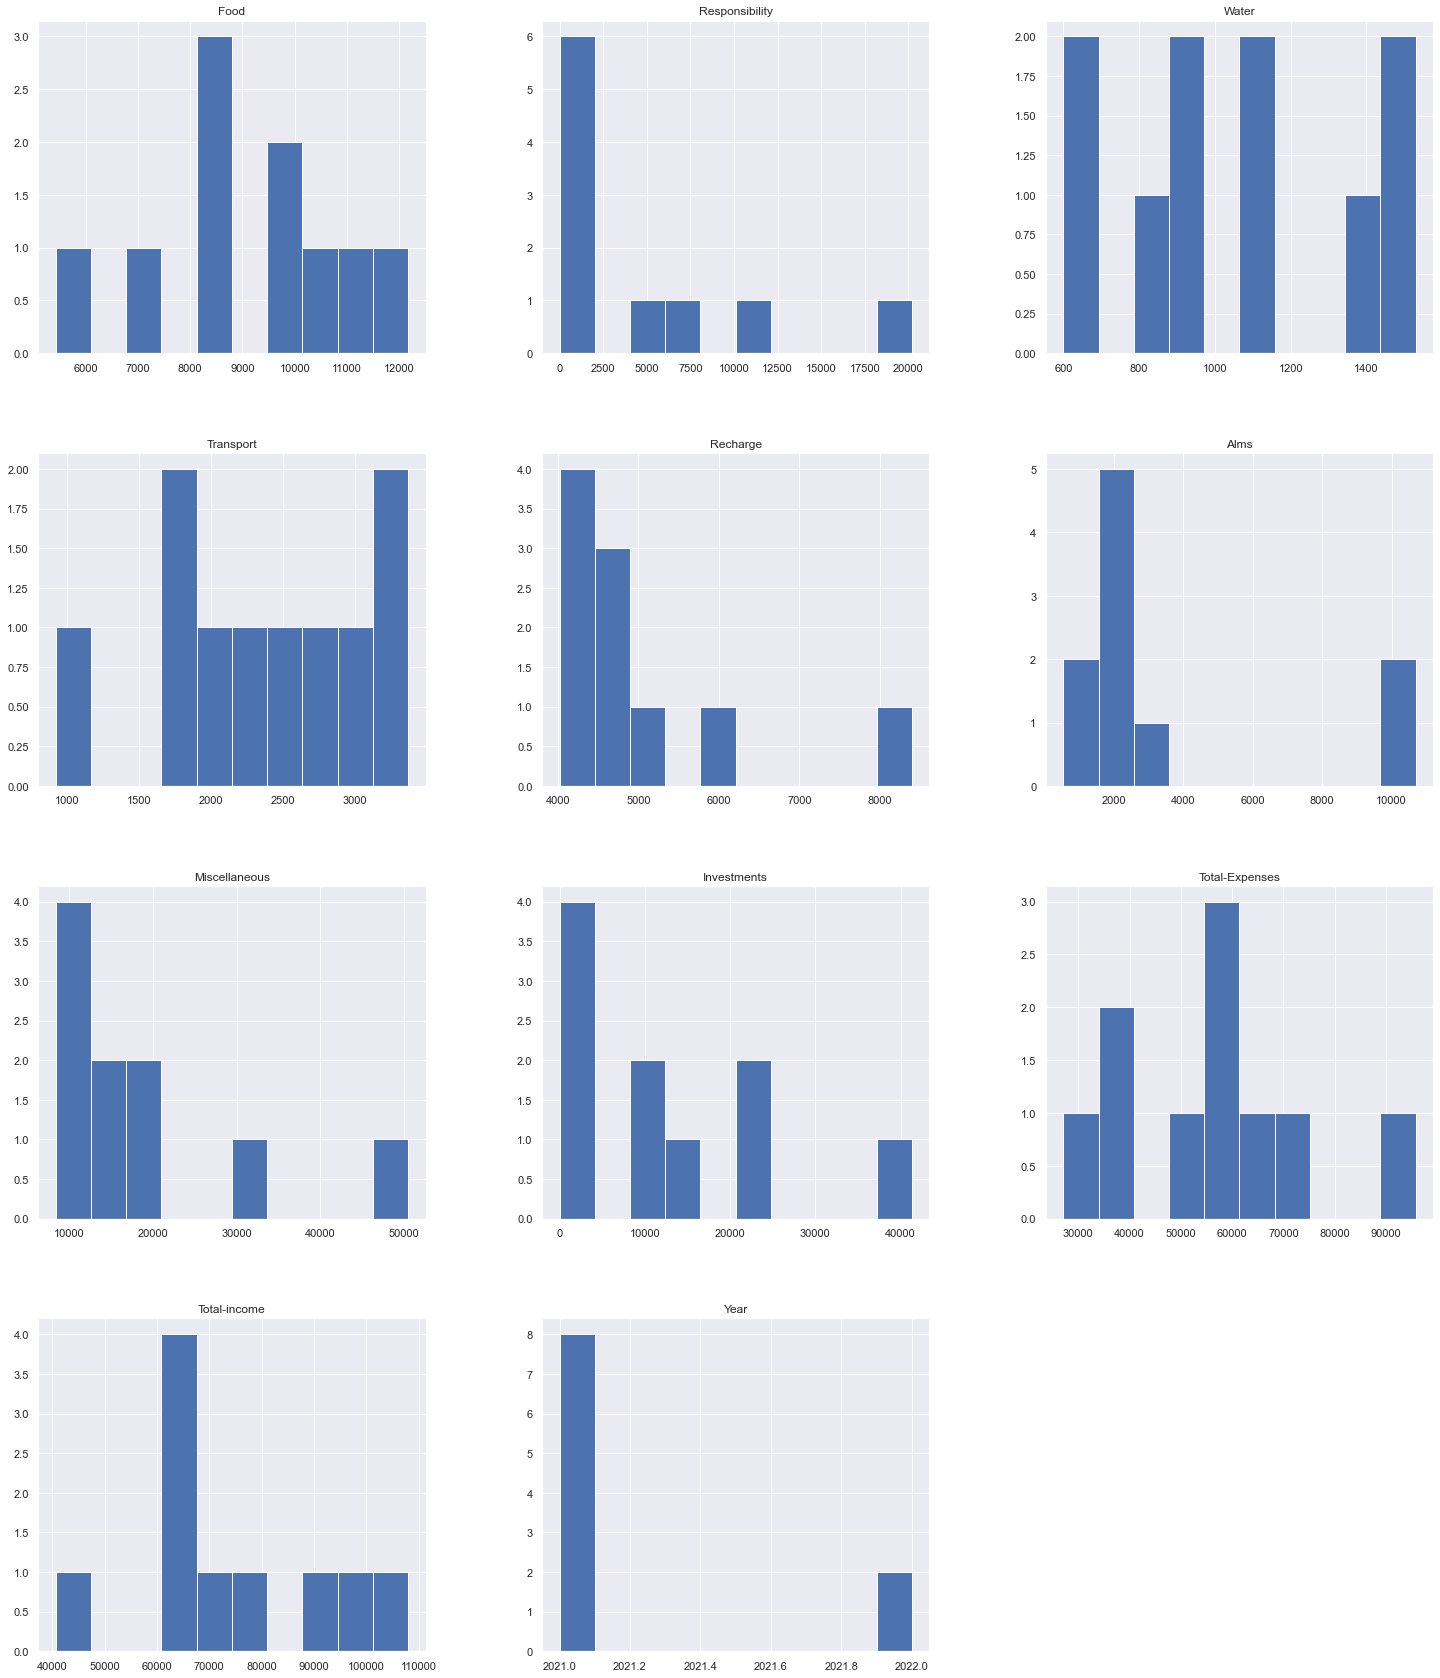

In [27]:
df.hist(figsize=(25,30));

### LINEAR REGRESSION

Rsquared Value: {0.24146349895727418}


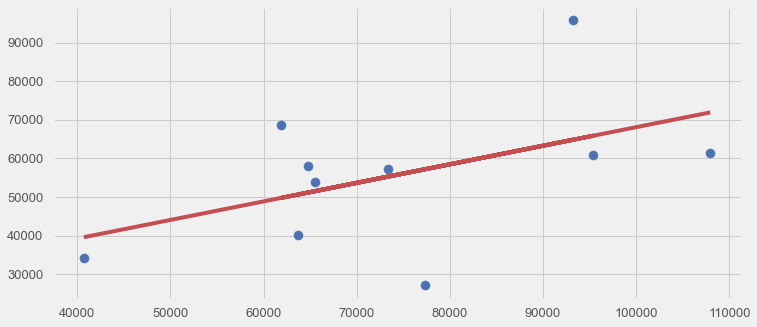

In [75]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["Total-income"], df["Total-Expenses"])

# Using Slope and Intercept from the regression to plot predicted values vs oberved
def predict(x):
    return slope * x + intercept

fitline = predict(df["Total-income"])
print('Rsquared Value:',{r_value**2})

style.use("fivethirtyeight")
plt.figure(figsize=(11, 5))
plt.scatter(df["Total-income"], df["Total-Expenses"], c='b')
plt.plot(df["Total-income"], fitline, c="r")
plt.show()

**Linear regression may not be suitable for forcasting the relationship between total income and expenses**

### POLYNOMIAL REGRESSION

Rsquared Value: 0.5253567094069145


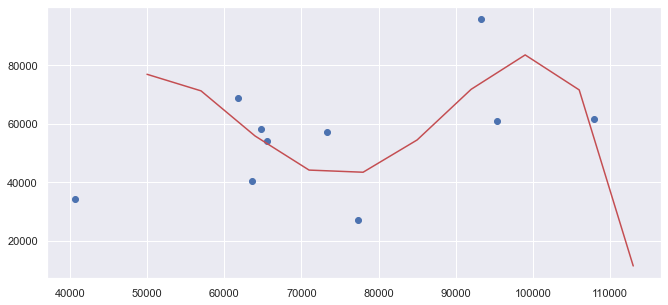

In [71]:
from sklearn.metrics import r2_score

X =  np.array(df["Total-income"])
y = np.array(df["Total-Expenses"].astype(np.float64))

# Fit X and y to a 4th degree polynomial
p4 = np.poly1d(np.polyfit(X, y, 4))

# Evaluation
R2 = r2_score(y, p4(X))
print('Rsquared Value:',R2)

# Visualizing the outcome
# xp is random income generated by numpy between 50000 and 100000 which our model p4 will predict on
xp = np.arange(50000, 120000, 7000)
plt.figure(figsize=(11, 5))
plt.scatter(X,y)
plt.plot(xp, p4(xp), c='r')
plt.show()

**Polynomial regeression forcasts that as income increases overtime, expenses will continue to come down in this dataset**

### PREDICTING SPENDING HABITS USING XGBOOST

Xgboost r2 Score: 0.9999999999997411


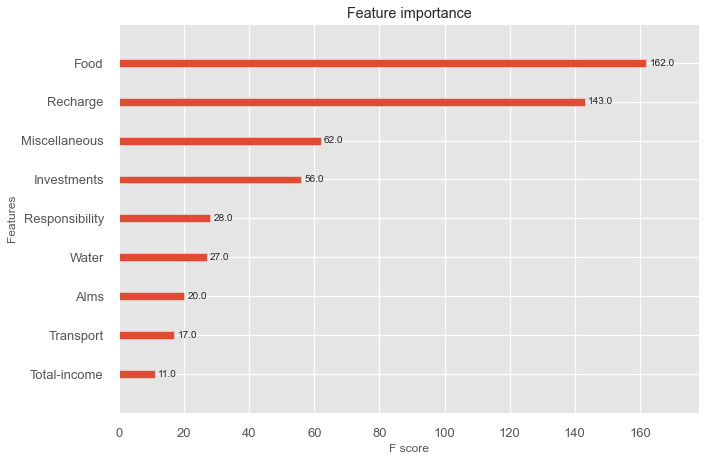

In [6]:
from xgboost import XGBRegressor
from xgboost import plot_importance
import matplotlib.style as style
style.use("seaborn-talk")
style.use("ggplot")



X = df[["Food", 'Responsibility', "Water", "Transport", "Recharge", "Alms", "Miscellaneous", "Investments", "Total-income"]]
y = df["Total-Expenses"]
model = XGBRegressor().fit(X, y)
plot_importance(model);
print(f"Xgboost r2 Score: {model.score(X,y)}")

**We can see that money spent on Food, Recharge, miscellaneous expenses and investments has the highest predictive abilities when it comes to estimating future expenses based on this dataset**

### WHAT FEATURE WAS THE MOST MONEY SPENT ON, DURING THAT PERIOD

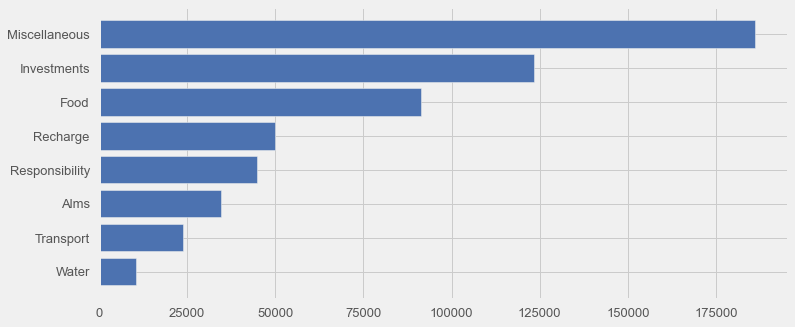

In [31]:
names = []
values = []
for k, v in df.items():
    if not pd.api.types.is_string_dtype(v):
        if k != 'Year':
            names.append(k)
            values.append(v.sum())
            

df2 = pd.DataFrame()
df2['Categories'] = names
df2['Sum-Total'] = values
sorted_df = df2.sort_values('Sum-Total', ascending=False)

style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(11, 5))
ax = ax.barh(sorted_df["Categories"][2:], sorted_df["Sum-Total"][2:], color=['b'])
plt.gca().invert_yaxis()
plt.show()

### TOTAL INCOME AND TOTAL EXPENSES AS RECORDED

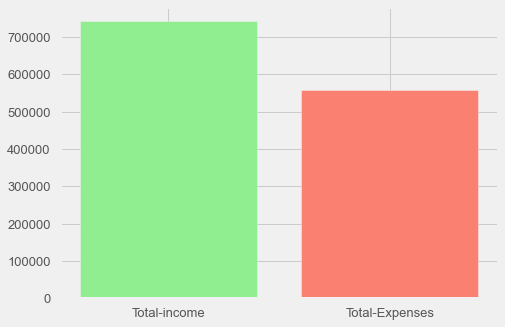

In [99]:
plt.figure(figsize=(7,5))
plt.bar(sorted_df['Categories'][:2], sorted_df['Sum-Total'][:2], color=['lightgreen', 'salmon']);

### CALCULATING  PERCENTAGE DIFFERENCES FROM INCOME AND EXPENSES

In [32]:
for k, v in sorted_df.items():
    if not pd.api.types.is_string_dtype(v):
        sorted_df['Percent-Of-Total-Income']= round(v/743780.00, 2)
        sorted_df['Percent-Difference-From-Income'] = round(1-v/743780, 2)
        sorted_df["Percent-Of-Total-Expenses"] = round(v/557745.66, 2)
        
sorted_df

,Categories,Sum-Total,Percent-Of-Total-Income,Percent-Difference-From-Income,Percent-Of-Total-Expenses
9,Total-income,743780.00,1.00,0.00,1.33
8,Total-Expenses,557745.66,0.75,0.25,1.00
6,Miscellaneous,186083.24,0.25,0.75,0.33
7,Investments,123288.17,0.17,0.83,0.22
0,Food,91380.00,0.12,0.88,0.16
4,Recharge,49847.00,0.07,0.93,0.09
1,Responsibility,44731.50,0.06,0.94,0.08
5,Alms,34725.75,0.05,0.95,0.06
3,Transport,23700.00,0.03,0.97,0.04
2,Water,10390.00,0.01,0.99,0.02


### FINAL CONCLUSION
* We can see that 75 percent of cash that 'came in' this period was not saved but rather spent, and this has to be looked at especially with respect to avoiding accidental squander if a raise is gotten suddenly.
* Miscellaneous expenses ranked the highest on features, where the most money was spent, however the important questions to ask become: Are these expenses unavoidable or are the just a consequence of miscalculated splurging by the earner?
* Money spent on food came out on top again as the feature with the highest predictive quality as it did in the 2021 income-expenses analysis, There is no doubt that the earner has to look at his feeding habit once again and make some improvements where neccessary.
* It is important to note that this experiment is a micro-part of 2021 income-expenses analysis as majority of the months in the service duration was in the year 2021, its sole aim was to get a different perspective about my habits if my previous low income data is not known as well as how I managed my money knowing fully well that when the service is over, I will be back to the old income level.
* The polynomial regression explains this phenomenon as it forcasts reduced expenses over the months even with increasing income as the earner tries to safeguard some of his cash in other to prepare  for 'would be rainy days' ahead. 

### BENEFITS OF THIS PROJECT
* Armed with this level of understanding around one's income and spending habits, there are no rooms for speculations anymore or panic seasons.
* There is also room for improvements if the user utilizes the insights from the research to adequately ration out his expenses to the important features as well as improve his income where neccessary.